# Peak finding algorithm experiment
This experiment explores some peak finding algorithm 


In [1]:
%matplotlib inline
import simulate
import find_peak_slope
import find_peak_value
import numpy as np
import matplotlib.pyplot as plt 
import scipy.signal as ss

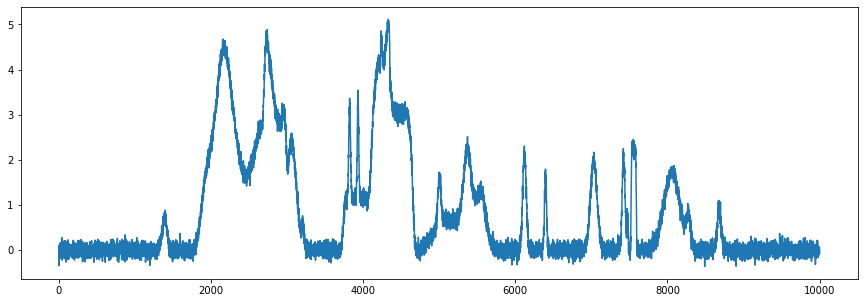

In [2]:
# original data
sp = simulate.random()
plt.figure(figsize=(15,5))
plt.plot(sp)
plt.show()

13.8 µs ± 187 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


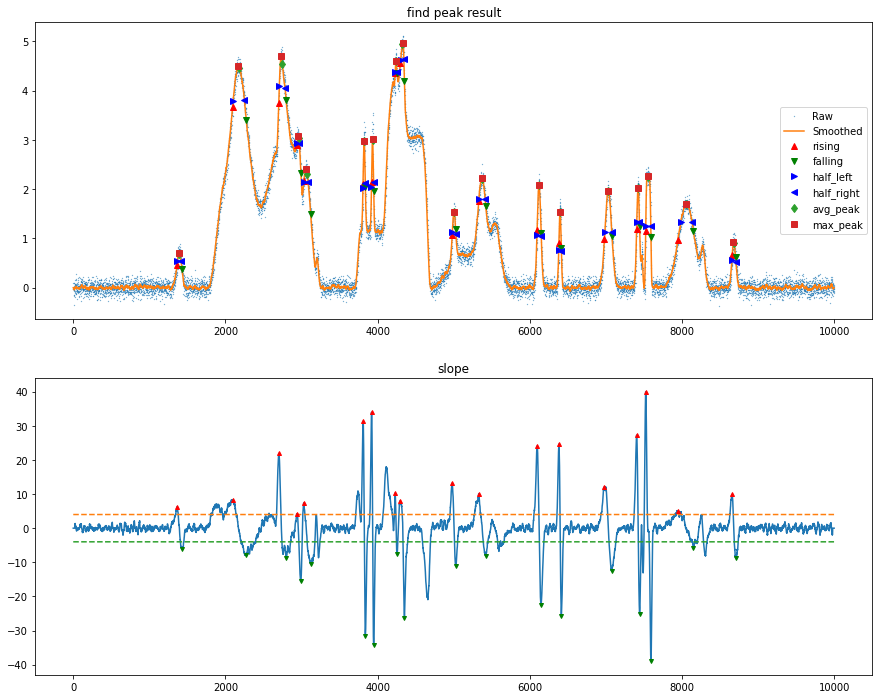

In [3]:
# find peak by slope
slope_th = 4
sm,dsp,rising_edge,falling_edge,avg_frq,max_frq,dev_band,half_left,half_right,half_band = find_peak_slope.find_peak_slope(sp,21,slope_th)
%timeit find_peak_slope.FindPeakBySlope(sm,slope_th,slope_th/3)
find_peak_slope.plot_all(sp,sm,dsp,slope_th,rising_edge,falling_edge,avg_frq,max_frq,dev_band,half_left,half_right,f=1,origin=None)


In [35]:
import numba
# @numba.njit
def FindBandByValue(x,th):
    """two pointer algorithm,"""
    idmax = 0
    rising_edge, falling_edge = [0], []
    maxloc = []
    i=0
    for d in x:      
        if d>x[idmax]:
            idmax = i
        if x[idmax]-d>th:
            if x[idmax-1]<x[idmax]:                
                rising = idmax
                while x[idmax]-x[rising]<th:
                    rising -= 1   
                    if rising < rising_edge[-1]:
                        break
                else:             
                    rising_edge.append(rising)
                    falling_edge.append(i)
                    maxloc.append(idmax)
            idmax = i
        i+=1
    return rising_edge[1:],falling_edge,maxloc

3.69 ms ± 113 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


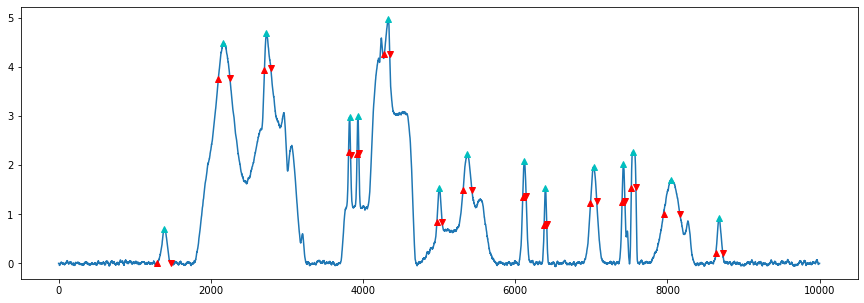

In [36]:
# find peak by band
band_th = 0.7
x = sm
rising_edge,falling_edge,maxloc = FindBandByValue(x,band_th)
%timeit find_peak_value.FindBandByValue(x,band_th)
plt.figure(figsize=(15,5))
plt.plot(x)
plt.plot(rising_edge,x[rising_edge],'r^')
plt.plot(falling_edge,x[falling_edge],'rv')
plt.plot(maxloc,x[maxloc],'c^')
plt.show()

In [37]:
%lprun -f FindBandByValue FindBandByValue(x,band_th)

Timer unit: 2.438e-07 s

Total time: 0.0313022 s
File: <ipython-input-35-853b209da900>
Function: FindBandByValue at line 3

Line #      Hits         Time  Per Hit   % Time  Line Contents
     3                                           def FindBandByValue(x,th):
     4                                               """two pointer algorithm,"""
     5         1          5.0      5.0      0.0      idmax = 0
     6         1          3.0      3.0      0.0      rising_edge, falling_edge = [0], []
     7         1          2.0      2.0      0.0      maxloc = []
     8         1          1.0      1.0      0.0      i=0
     9     10001      22299.0      2.2     17.4      for d in x:      
    10     10000      26389.0      2.6     20.6          if d>x[idmax]:
    11      1621       2472.0      1.5      1.9              idmax = i
    12     10000      47656.0      4.8     37.1          if x[idmax]-d>th:
    13        40        226.0      5.7      0.2              if x[idmax-1]<x[idmax]:        